In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid-submission-sample/SampleSubmission.csv
/kaggle/input/last-week-with-continents/last week with continents.csv
/kaggle/input/covid19all/train_week_1_ahead.csv
/kaggle/input/covid19all/train_with_continents.csv
/kaggle/input/covid19all/train_week_two_data.csv
/kaggle/input/last-week-covid/last week.csv


In [2]:
#pip install pycountry-convert
#using pycountry-convert in kaggle turned out to be a deliberate scam and it did not work out in my favor
#used the alternative which is to tweak the dataset in excel manually and added the column for the continent

In [3]:
#let us start by reading the data using pandas
data = pd.read_csv ("../input/covid19all/train_with_continents.csv")

In [4]:
data1 = pd.read_csv ("../input/covid19all/train_week_1_ahead.csv")
data2 = pd.read_csv ("../input/covid19all/train_week_two_data.csv")
data3 = pd.read_csv("../input/last-week-with-continents/last week with continents.csv")

In [5]:
'''lets look at whether the data is of the same size and shape so that we can append the necessary columns to the
latest dataset which is data2
'''
print('the size and shape of the data is:',data.shape,'and',data.size)
print('the size and shape of the data1 is:',data1.shape,'and',data1.size)
print('the size and shape of the data2 is:',data2.shape,'and',data2.size)
print('the size and shape of the data3 is:',data3.shape,'and',data3.size)

the size and shape of the data is: (10659, 6) and 63954
the size and shape of the data1 is: (11913, 5) and 59565
the size and shape of the data2 is: (13376, 5) and 66880
the size and shape of the data3 is: (14839, 6) and 89034


In [6]:
#lets look at how our data looks like for the first few rows
data3.head()

,Territory X Date,target,cases,Territory,Date,Continent
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/2020,Asia
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/2020,Asia
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/2020,Asia
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/2020,Asia
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/2020,Asia


In [7]:
#checking the data 1 which shows the week one after I joined the competition
data1.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/20
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/20
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/20
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/20


In [8]:
#checking the data 2 which shows the week two after I joined the competition
data2.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/20
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/20
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/20
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/20


In [9]:
#lets get the information we want to know about the whole data
display(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14839 entries, 0 to 14838
Data columns (total 6 columns):
Territory X Date    14839 non-null object
target              14839 non-null int64
cases               14839 non-null int64
Territory           14839 non-null object
Date                14839 non-null object
Continent           14839 non-null object
dtypes: int64(2), object(4)
memory usage: 695.7+ KB


None

In [10]:
'''looking at the above data2 we can see that the date column comes out as an object(string) lets change that for sth 
that is going to be easily used during EDA
'''
#creating a copy of some part of the dataframe
#data3['date'] = data3['Date'].copy()
from datetime import datetime
#data2['Date'] = pd.to_datetime(data2['Date'], format = '%m/%d/%Y')
data3['Date converted'] = pd.to_datetime(data3['Date'])

In [11]:
#lets see if the data.dtype for the date column has changed
display(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14839 entries, 0 to 14838
Data columns (total 7 columns):
Territory X Date    14839 non-null object
target              14839 non-null int64
cases               14839 non-null int64
Territory           14839 non-null object
Date                14839 non-null object
Continent           14839 non-null object
Date converted      14839 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 811.6+ KB


None

In [12]:
#lets look at the unique names for the columns and from there also the unique values so as to drop unwanted data
list(data3.columns)

['Territory X Date',
 'target',
 'cases',
 'Territory',
 'Date',
 'Continent',
 'Date converted']

In [13]:
#dropping the repeated columns which are the last two
#repeated_columns_for_dropping = data[['Territory','Date']]
#data = data.drop(repeated_columns_for_dropping,axis = 1)

In [14]:
#lets look at the train data description to better understand the data
data3.describe()

,target,cases
count,14839.000000,14839.000000
mean,32.381427,775.141047
std,375.334595,6906.907700
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,7.000000
max,13155.000000,213372.000000


In [15]:
print("Number of Territories: ", data['Territory'].nunique())
print("Number of Territories: ", data1['Territory'].nunique())
print("Number of Territories: ", data2['Territory'].nunique())
print("Number of Territories: ", data3['Territory'].nunique())
print("Dates go from day", min(data['Date']), "to day", max(data['Date']), ", a total of", data['Date'].nunique(), "days")
print("Dates go from day", min(data1['Date']), "to day", max(data1['Date']), ", a total of", data1['Date'].nunique(), "days")
print("Dates go from day", min(data2['Date']), "to day", max(data2['Date']), ", a total of", data2['Date'].nunique(), "days")
print("Dates go from day", min(data3['Date']), "to day", max(data3['Date']), ", a total of", data3['Date'].nunique(), "days")
#our data has no states
#print("Countries with Province/State informed: ", data[data['Province/State'].isna()==False]['Country/Region'].unique())

Number of Territories:  209
Number of Territories:  209
Number of Territories:  209
Number of Territories:  209
Dates go from day 1/22/2020 to day 3/9/2020 , a total of 51 days
Dates go from day 1/22/20 to day 3/9/20 , a total of 57 days
Dates go from day 1/22/20 to day 3/9/20 , a total of 64 days
Dates go from day 1/22/2020 to day 4/1/2020 , a total of 71 days


In [16]:
'''#let us look at these territories just to make sure that each stands on its own
we actually do not need thia cell so we can do away with it
print(data['Territory'].nunique())
print(data2['Territory'].nunique())
'''

"#let us look at these territories just to make sure that each stands on its own\nwe actually do not need thia cell so we can do away with it\nprint(data['Territory'].nunique())\nprint(data2['Territory'].nunique())\n"

In [17]:
#from the above data we can see that each country appears only once 
#lets see the number of entries per Territory
data['Territory'].value_counts()
data1['Territory'].value_counts()
data2['Territory'].value_counts()
data3['Territory'].value_counts()

Panama                        71
Cambodia                      71
Montenegro                    71
Croatia                       71
Lebanon                       71
                              ..
Equatorial Guinea             71
Cuba                          71
Tunisia                       71
Nigeria                       71
Iran (Islamic Republic of)    71
Name: Territory, Length: 209, dtype: int64

In [18]:
'''# produces Pandas Series
data.groupby('month')['duration'].sum() 
# Produces Pandas DataFrame
data.groupby('month')[['duration']].sum()
'''

"# produces Pandas Series\ndata.groupby('month')['duration'].sum() \n# Produces Pandas DataFrame\ndata.groupby('month')[['duration']].sum()\n"

Text(0.5, 0, 'Date')

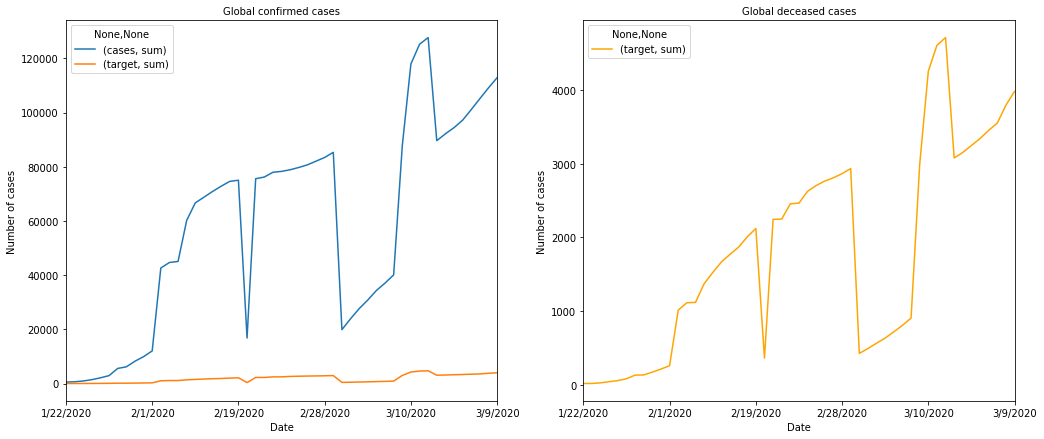

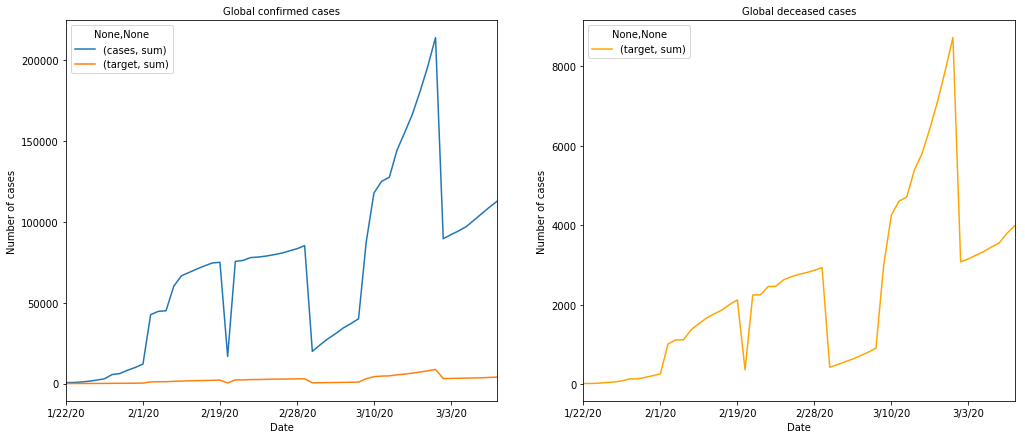

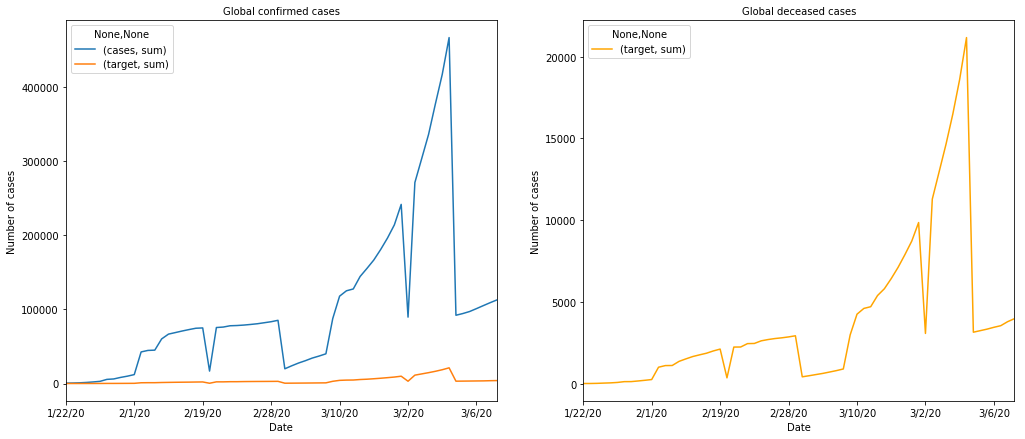

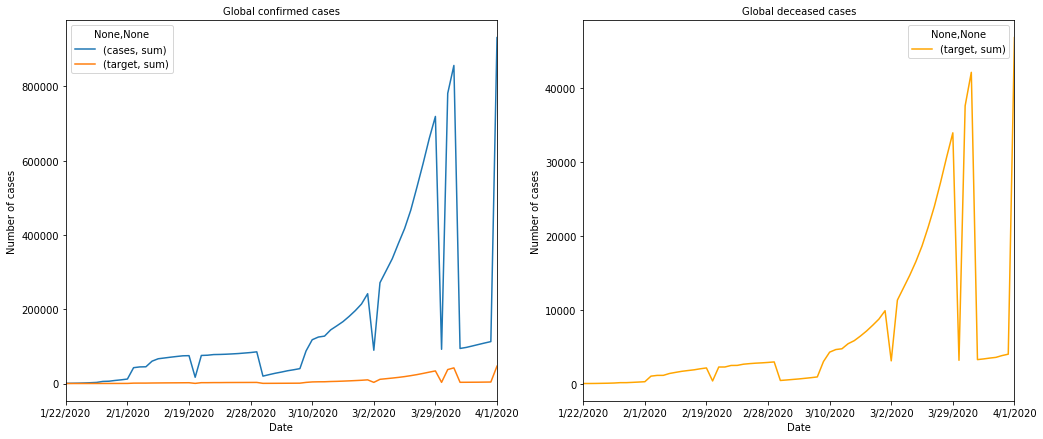

In [19]:
#lets check the number of deaths and infected confirmed cases by using plots
#importing the necessary dependency
import matplotlib.pyplot as plt
#for week one

confirmed_total_date = data.groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date = data.groupby(['Date']).agg({'target':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for week  two
confirmed_total_date = data1.groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date = data1.groupby(['Date']).agg({'target':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for week three 
confirmed_total_date = data2.groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date = data2.groupby(['Date']).agg({'target':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)


#for the last week 
confirmed_total_date = data3.groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date = data3.groupby(['Date']).agg({'target':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

we know that the virus originated from china so we can use this to compare with the China graph for both the confirmed cases against the deaths and check if the graphs flow the same remembering that during some time china changed how it considered whether somebody was considered positive (11/03/2020).This may be registered as a spike and considering other policies that are put in place that may likely affect the number of cases of the infected people.


Text(0.5, 0, 'Date')

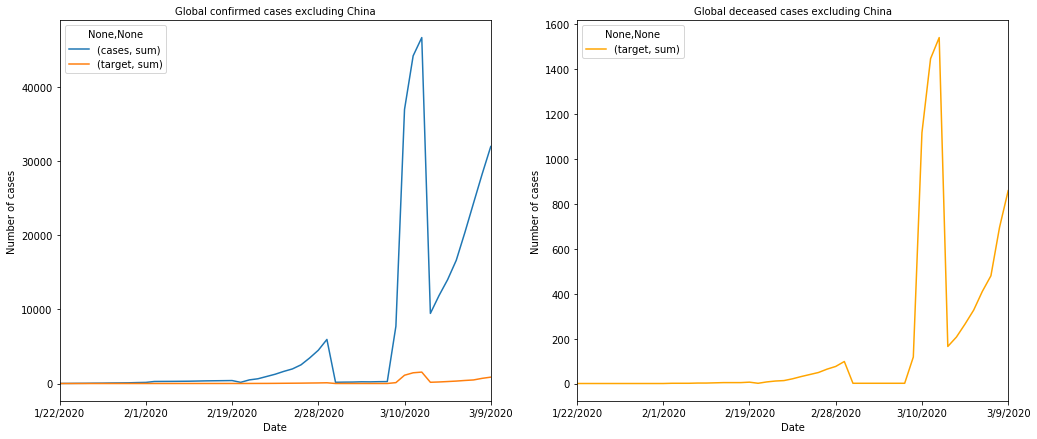

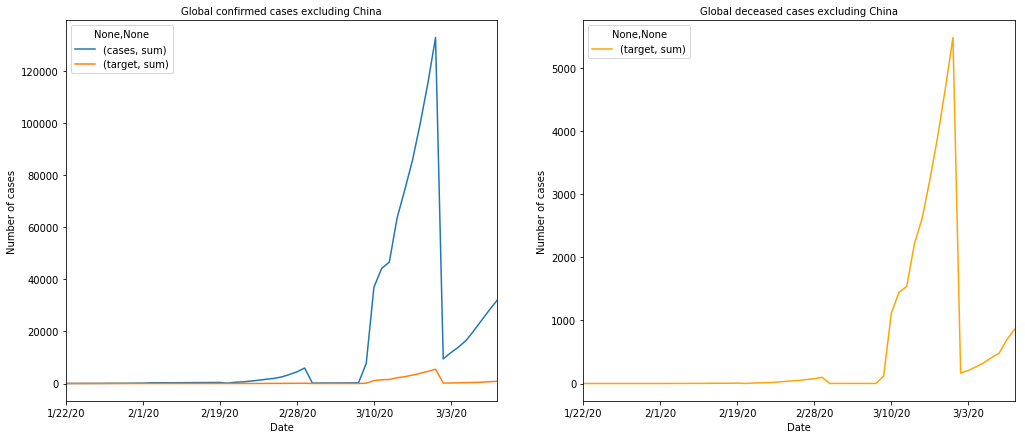

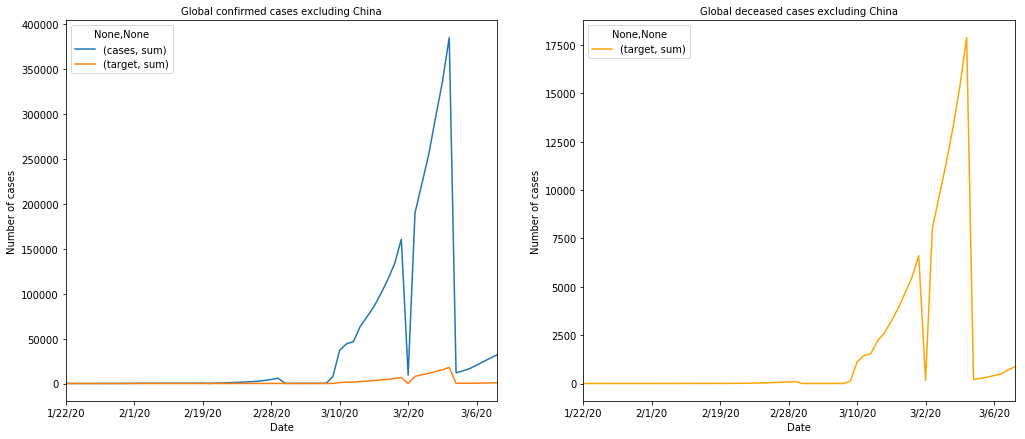

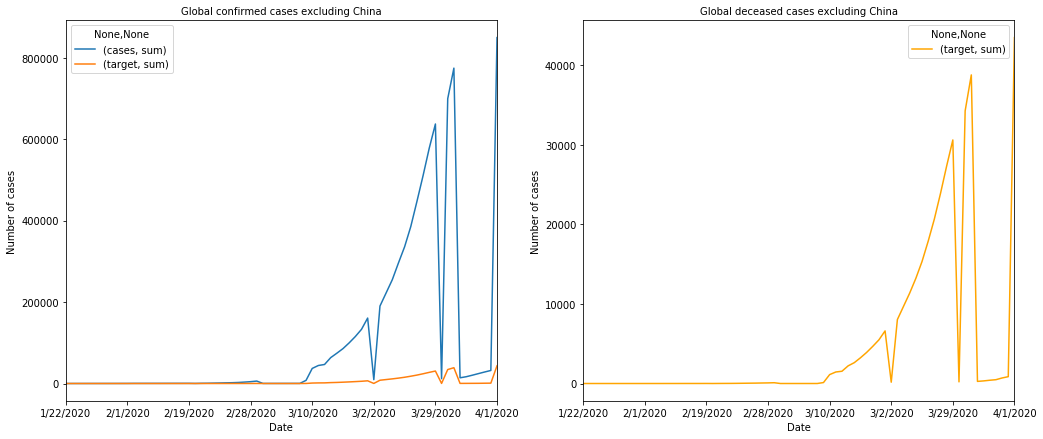

In [20]:
#lets draw the curve excluding china
#for week one
confirmed_total_date_noChina = data[data['Territory']!='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_noChina = data[data['Territory']!='China'].groupby(['Date']).agg({'target':['sum']})
total_date_noChina = confirmed_total_date_noChina.join(fatalities_total_date_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_noChina.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding China", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for week two 
confirmed_total_date_noChina = data1[data1['Territory']!='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_noChina = data1[data1['Territory']!='China'].groupby(['Date']).agg({'target':['sum']})
total_date_noChina = confirmed_total_date_noChina.join(fatalities_total_date_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_noChina.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding China", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for week 3
confirmed_total_date_noChina = data2[data2['Territory']!='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_noChina = data2[data2['Territory']!='China'].groupby(['Date']).agg({'target':['sum']})
total_date_noChina = confirmed_total_date_noChina.join(fatalities_total_date_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_noChina.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding China", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)


#for last week
confirmed_total_date_noChina = data3[data3['Territory']!='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_noChina = data3[data3['Territory']!='China'].groupby(['Date']).agg({'target':['sum']})
total_date_noChina = confirmed_total_date_noChina.join(fatalities_total_date_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_noChina.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding China", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

Without China we should be getting a smoother curve as which more or less looks like the SIR model for epidemiology where there is a steep rise then a gentle drop in the number of cases but remember that unlike other countries that can learn from China,China had no prior warning of the contagion.

Text(0.5, 0, 'Date')

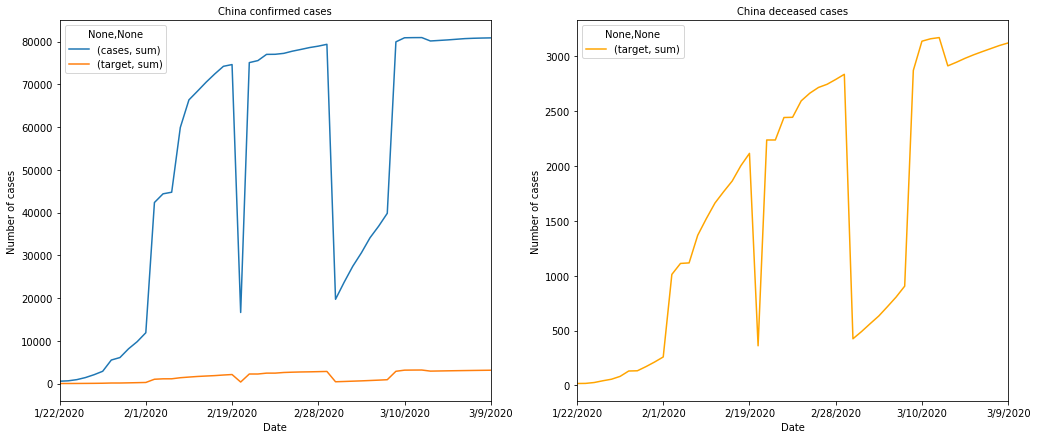

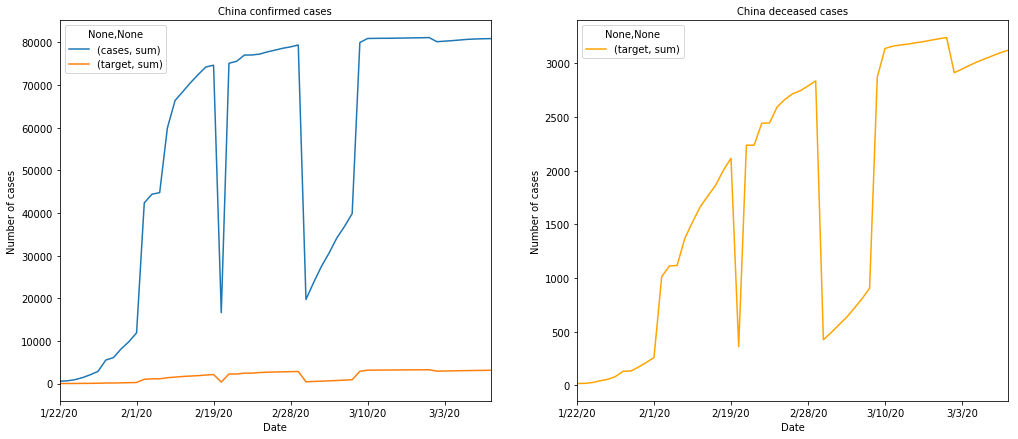

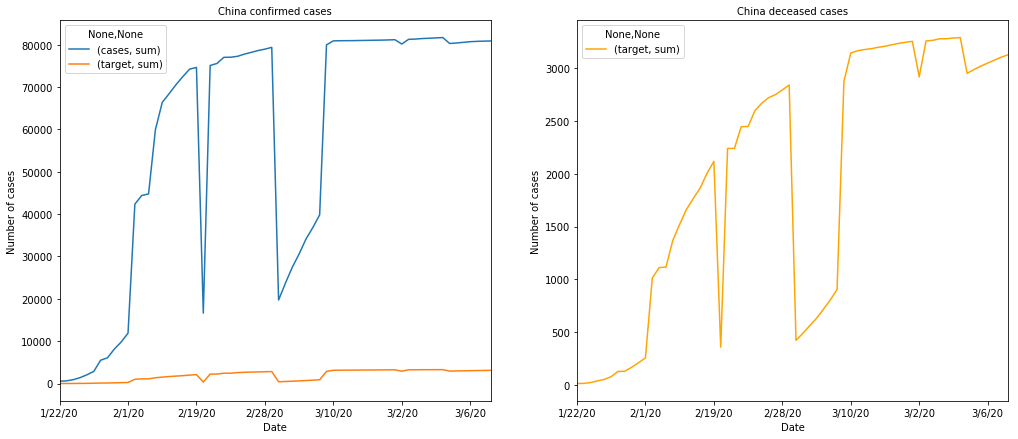

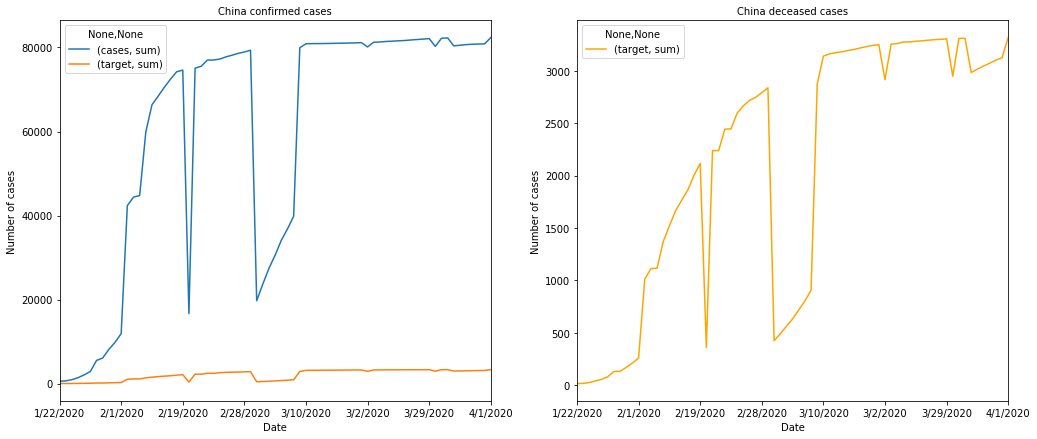

In [21]:
#for week one
confirmed_total_date_China = data[data['Territory']=='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_China = data[data['Territory']=='China'].groupby(['Date']).agg({'target':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_China.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)
#for week two
confirmed_total_date_China = data1[data1['Territory']=='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_China = data1[data1['Territory']=='China'].groupby(['Date']).agg({'target':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_China.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for week 3
confirmed_total_date_China = data2[data2['Territory']=='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_China = data2[data2['Territory']=='China'].groupby(['Date']).agg({'target':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_China.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for last week of the prediction
confirmed_total_date_China = data3[data3['Territory']=='China'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_China = data3[data3['Territory']=='China'].groupby(['Date']).agg({'target':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_China.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

Text(0.5, 0, 'Date')

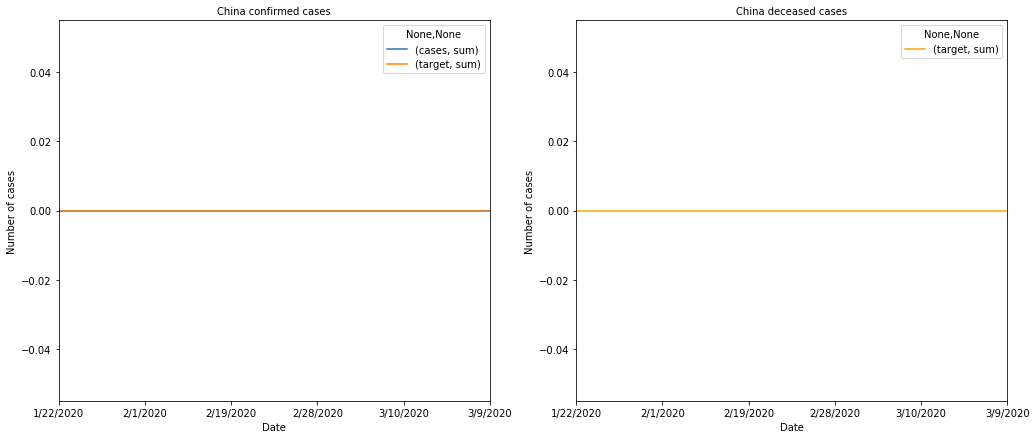

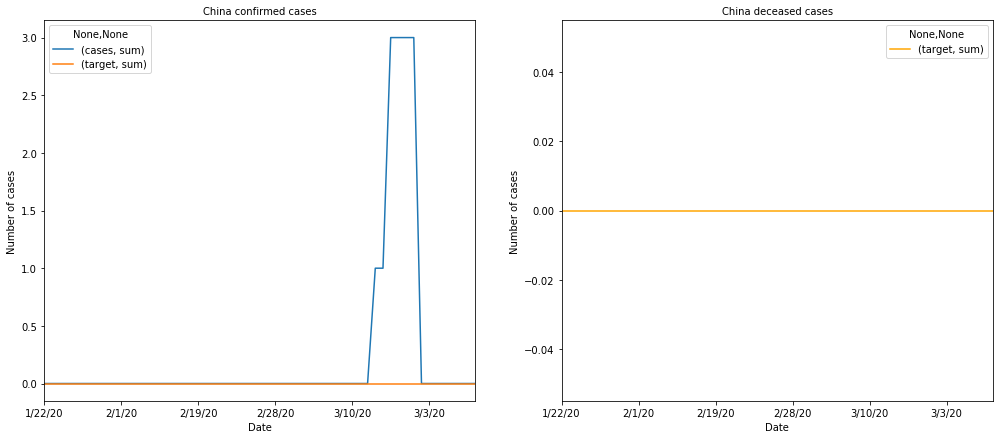

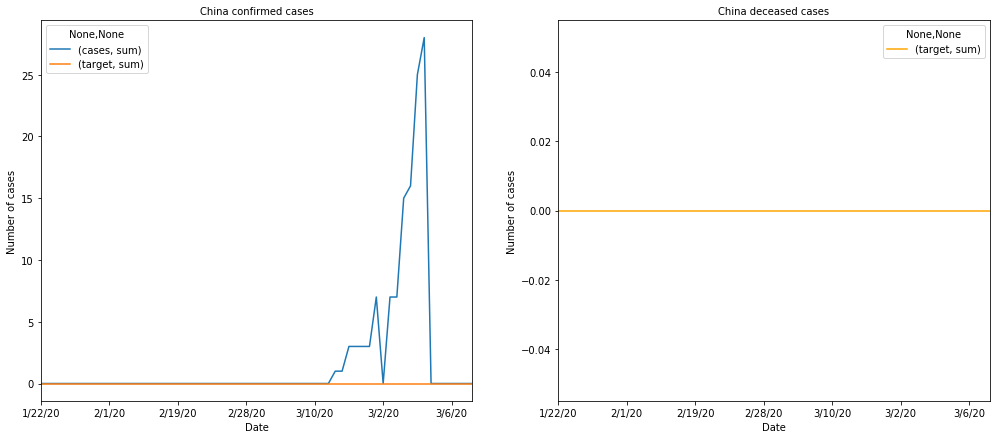

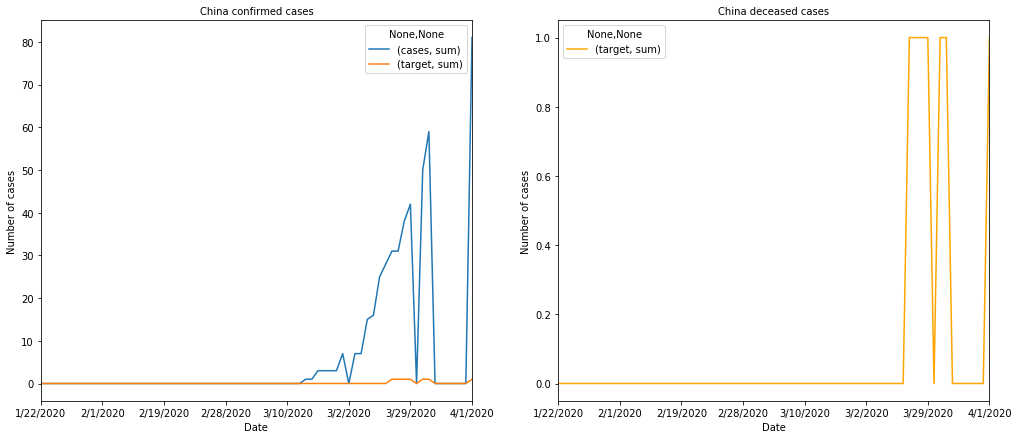

In [22]:
#for week one
confirmed_total_date_kenya = data[data['Territory']=='Kenya'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_kenya = data[data['Territory']=='Kenya'].groupby(['Date']).agg({'target':['sum']})
total_date_kenya = confirmed_total_date_kenya.join(fatalities_total_date_kenya)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_kenya.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_kenya.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for week two
confirmed_total_date_kenya = data1[data1['Territory']=='Kenya'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_kenya = data1[data1['Territory']=='Kenya'].groupby(['Date']).agg({'target':['sum']})
total_date_kenya = confirmed_total_date_kenya.join(fatalities_total_date_kenya)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_kenya.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_kenya.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for week 3
confirmed_total_date_kenya = data2[data2['Territory']=='Kenya'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_kenya = data2[data2['Territory']=='Kenya'].groupby(['Date']).agg({'target':['sum']})
total_date_kenya = confirmed_total_date_kenya.join(fatalities_total_date_kenya)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_kenya.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_kenya.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

#for last week of prediction
confirmed_total_date_kenya = data3[data3['Territory']=='Kenya'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_kenya = data3[data3['Territory']=='Kenya'].groupby(['Date']).agg({'target':['sum']})
total_date_kenya = confirmed_total_date_kenya.join(fatalities_total_date_kenya)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_kenya.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=10)
ax1.set_ylabel("Number of cases", size=10)
ax1.set_xlabel("Date", size=10)
fatalities_total_date_kenya.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=10)
ax2.set_ylabel("Number of cases", size=10)
ax2.set_xlabel("Date", size=10)

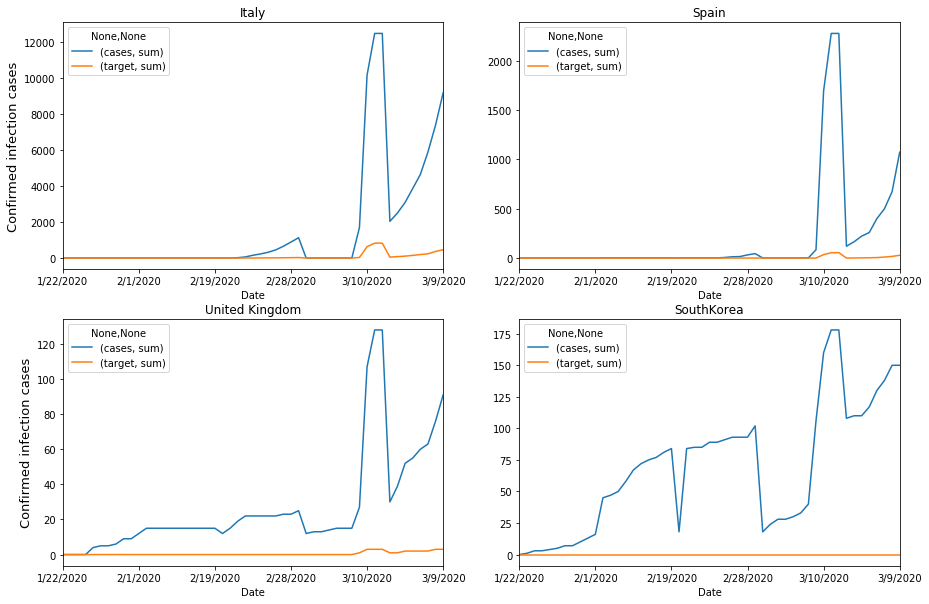

In [23]:
#looking at the worst hit countries as of now for week one
#Italy
confirmed_total_date_Italy = data[data['Territory']=='Italy'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Italy = data[data['Territory']=='Italy'].groupby(['Date']).agg({'target':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#Spain
confirmed_total_date_Spain = data[data['Territory']=='Spain'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Spain = data[data['Territory']=='Spain'].groupby(['Date']).agg({'target':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)
#Autralia
confirmed_total_date_Australia = data[data['Territory']=='Australia'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Australia = data[data['Territory']=='Australia'].groupby(['Date']).agg({'target':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)
#Singapore
confirmed_total_date_Singapore = data[data['Territory']=='Singapore'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Singapore = data[data['Territory']=='Singapore'].groupby(['Date']).agg({'target':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)
#South Korea
#Singapore
confirmed_total_date_SouthKorea = data[data['Territory']=='Republic of Korea'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_SouthKorea = data[data['Territory']=='Republic of Korea'].groupby(['Date']).agg({'target':['sum']})
total_date_SouthKorea = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_Australia.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

'''plt.subplot(2, 2, 4)
total_date_Singapore.plot(ax=plt.gca(), title='Singapore')
'''
plt.subplot(2, 2, 4)
total_date_SouthKorea.plot(ax=plt.gca(), title='SouthKorea')

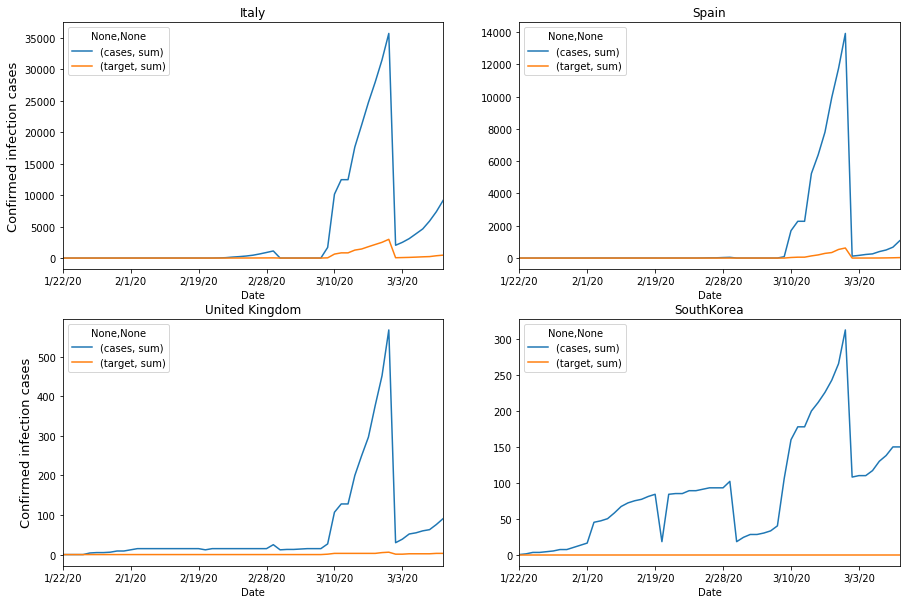

In [24]:
#looking at the worst hit countries as of now for week 2
#Italy
confirmed_total_date_Italy = data1[data1['Territory']=='Italy'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Italy = data1[data1['Territory']=='Italy'].groupby(['Date']).agg({'target':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#Spain
confirmed_total_date_Spain = data1[data1['Territory']=='Spain'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Spain = data1[data1['Territory']=='Spain'].groupby(['Date']).agg({'target':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)
#Autralia
confirmed_total_date_Australia = data1[data1['Territory']=='Australia'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Australia = data1[data1['Territory']=='Australia'].groupby(['Date']).agg({'target':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)
#Singapore
confirmed_total_date_Singapore = data1[data1['Territory']=='Singapore'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Singapore = data1[data1['Territory']=='Singapore'].groupby(['Date']).agg({'target':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)
#South Korea
#Singapore
confirmed_total_date_SouthKorea = data1[data1['Territory']=='Republic of Korea'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_SouthKorea = data1[data1['Territory']=='Republic of Korea'].groupby(['Date']).agg({'target':['sum']})
total_date_SouthKorea = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_Australia.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

'''plt.subplot(2, 2, 4)
total_date_Singapore.plot(ax=plt.gca(), title='Singapore')
'''
plt.subplot(2, 2, 4)
total_date_SouthKorea.plot(ax=plt.gca(), title='SouthKorea')

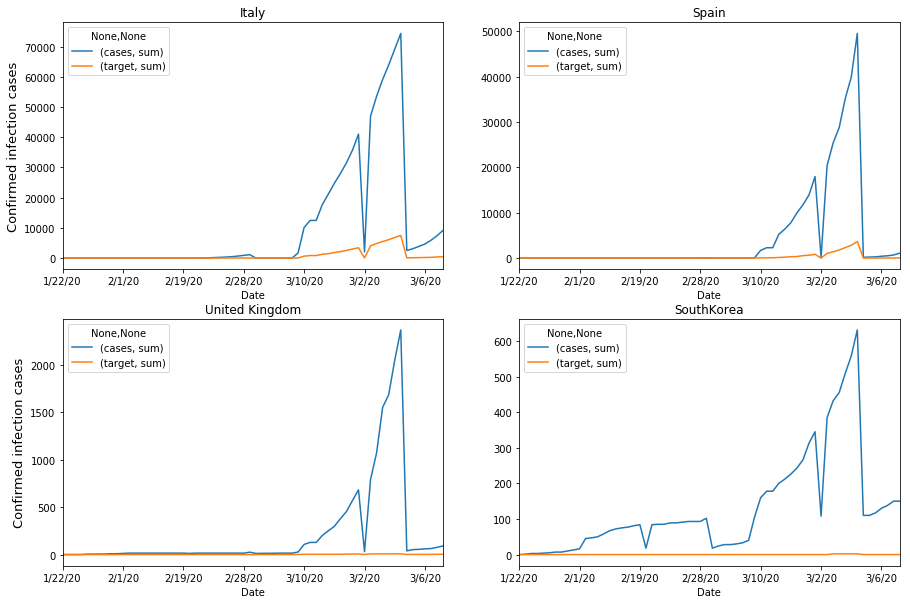

In [25]:
#looking at the worst hit countries as of now for week 3
#Italy
confirmed_total_date_Italy = data2[data2['Territory']=='Italy'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Italy = data2[data2['Territory']=='Italy'].groupby(['Date']).agg({'target':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#Spain
confirmed_total_date_Spain = data2[data2['Territory']=='Spain'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Spain = data2[data2['Territory']=='Spain'].groupby(['Date']).agg({'target':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)
#Autralia
confirmed_total_date_Australia = data2[data2['Territory']=='Australia'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Australia = data2[data2['Territory']=='Australia'].groupby(['Date']).agg({'target':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)
#Singapore
confirmed_total_date_Singapore = data2[data2['Territory']=='Singapore'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Singapore = data2[data2['Territory']=='Singapore'].groupby(['Date']).agg({'target':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)
#South Korea
#Singapore
confirmed_total_date_SouthKorea = data2[data2['Territory']=='Republic of Korea'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_SouthKorea = data2[data2['Territory']=='Republic of Korea'].groupby(['Date']).agg({'target':['sum']})
total_date_SouthKorea = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_Australia.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

'''plt.subplot(2, 2, 4)
total_date_Singapore.plot(ax=plt.gca(), title='Singapore')
'''
plt.subplot(2, 2, 4)
total_date_SouthKorea.plot(ax=plt.gca(), title='SouthKorea')

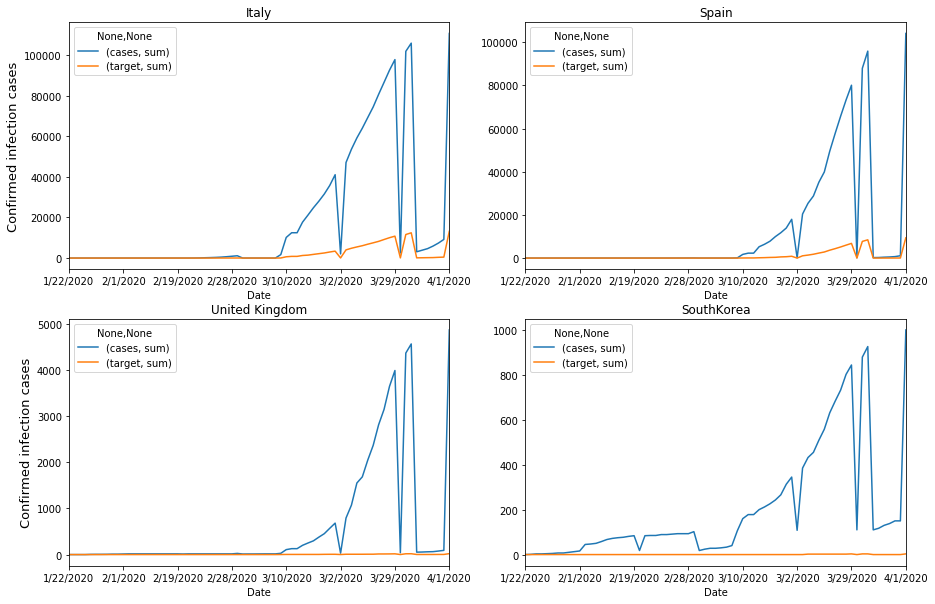

In [26]:
#looking at the worst hit countries as of now for last week of the prediction 
#Italy
confirmed_total_date_Italy = data3[data3['Territory']=='Italy'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Italy = data3[data3['Territory']=='Italy'].groupby(['Date']).agg({'target':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#Spain
confirmed_total_date_Spain = data3[data3['Territory']=='Spain'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Spain = data3[data3['Territory']=='Spain'].groupby(['Date']).agg({'target':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)
#Autralia
confirmed_total_date_Australia = data3[data3['Territory']=='Australia'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Australia = data3[data3['Territory']=='Australia'].groupby(['Date']).agg({'target':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)
#Singapore
confirmed_total_date_Singapore = data3[data3['Territory']=='Singapore'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_Singapore = data3[data3['Territory']=='Singapore'].groupby(['Date']).agg({'target':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)
#South Korea
#Singapore
confirmed_total_date_SouthKorea = data3[data3['Territory']=='Republic of Korea'].groupby(['Date']).agg({'cases':['sum']})
fatalities_total_date_SouthKorea = data3[data3['Territory']=='Republic of Korea'].groupby(['Date']).agg({'target':['sum']})
total_date_SouthKorea = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_Australia.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

'''plt.subplot(2, 2, 4)
total_date_Singapore.plot(ax=plt.gca(), title='Singapore')
'''
plt.subplot(2, 2, 4)
total_date_SouthKorea.plot(ax=plt.gca(), title='SouthKorea')

In [27]:
#what type of data can we deduce from the given data
#we can get the mortality rate in the countries as of the beginning of the beginning and we will compare with other weeks
data3.head()

,Territory X Date,target,cases,Territory,Date,Continent,Date converted
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/2020,Asia,2020-01-22
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/2020,Asia,2020-01-23
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/2020,Asia,2020-01-24
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/2020,Asia,2020-01-25
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/2020,Asia,2020-01-26


In [28]:
'''calculating the difference between cases and target that will help in getting mortality rate in different weeks
and seeing among them there may be recoveries'''
data['diff']=data['cases'] - data['target']
#week one diff
data1['diff']=data1['cases'] - data1['target']
#week two diff
data2['diff']=data2['cases'] - data2['target']
#week last diff
data3['diff']=data3['cases'] - data3['target']

In [29]:
#lets look through the three developed diff columns and see whether their are any missing values
#for the first dataset
print(data.isna().any())
print(data.isna().sum())
#for the second dataset
print(data1.isna().any())
print(data1.isna().sum())
#for the third dataset
print(data2.isna().any())
print(data2.isna().sum())
#for the last dataset
print(data3.isna().any())
print(data3.isna().sum())

Territory X Date    False
target              False
cases               False
Territory           False
Date                False
Continent           False
diff                False
dtype: bool
Territory X Date    0
target              0
cases               0
Territory           0
Date                0
Continent           0
diff                0
dtype: int64
Territory X Date    False
target              False
cases               False
Territory           False
Date                False
diff                False
dtype: bool
Territory X Date    0
target              0
cases               0
Territory           0
Date                0
diff                0
dtype: int64
Territory X Date    False
target              False
cases               False
Territory           False
Date                False
diff                False
dtype: bool
Territory X Date    0
target              0
cases               0
Territory           0
Date                0
diff                0
dtype: int64
Territory X D

In [30]:
'''#calculating the increase in the number of cases between the weeks
data['weekoneincrease']=data1['cases'] - data['cases']
data['weektwoincreasefromweekone']=data2['cases'] - data1['cases']
this is no necessary just calculate the values in a descending order
'''
#calculate the rise in cases by subtracting the previous value of a row with another 
#data1["risen cases"] = data1["cases"].diff(-1)
#we use the +ve notation since we want o subtract one from the next
data3["risen cases"] = data3["cases"].diff(1)

In [31]:
#replacing the first value with a zero
data3["risen cases"]=data3['risen cases'].replace(np.nan, 0.00, regex=True)

In [32]:
#checking whether there are any zero values in our latest dataset
print(data3.isna().sum())

Territory X Date    0
target              0
cases               0
Territory           0
Date                0
Continent           0
Date converted      0
diff                0
risen cases         0
dtype: int64


In [33]:
#lets also add a column of the rise in deaths to our latest data set
data3["risen targets daily"] = data3["target"].diff(1)
#change the value of the first loc[0] to a 0
data3['risen targets daily'] = data3['risen targets daily'].replace(np.nan, 0.00, regex=True)

In [34]:
#checking whether the difference column has been created
data3.head()

,Territory X Date,target,cases,Territory,Date,Continent,Date converted,diff,risen cases,risen targets daily
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/2020,Asia,2020-01-22,0,0.0,0.0
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/2020,Asia,2020-01-23,0,0.0,0.0
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/2020,Asia,2020-01-24,0,0.0,0.0
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/2020,Asia,2020-01-25,0,0.0,0.0
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/2020,Asia,2020-01-26,0,0.0,0.0


In [35]:
#calculating the mortality rates of different Territories rounded off to two decimal places
#last week mortality rate
data3['mortality rate last week'] = round((data3['target']/data3['cases']) * 100,2)

In [36]:
#replacing the Nans in the mortality rate with 0.00
data3['mortality rate last week'] = data3['mortality rate last week'].replace(np.nan, 0.00, regex=True)

In [37]:
#looking at the data type for the various columns that we have
print(data3.dtypes)

Territory X Date                    object
target                               int64
cases                                int64
Territory                           object
Date                                object
Continent                           object
Date converted              datetime64[ns]
diff                                 int64
risen cases                        float64
risen targets daily                float64
mortality rate last week           float64
dtype: object


In [38]:
#checking the values for mortality rate
print("mortality rates in last week: ", data3['mortality rate last week'].nunique())

mortality rates in last week:  628


In [39]:
#finding out the rise in mortality rate per day in each of the territories
data3["mortality rate rise per day"] = data3["mortality rate last week"].diff(1)
#change the value of the first loc[0] to a 0
data3['mortality rate rise per day'] = data3['mortality rate rise per day'].replace(np.nan, 0.00, regex=True)

In [40]:
data3.head()

,Territory X Date,target,cases,Territory,Date,Continent,Date converted,diff,risen cases,risen targets daily,mortality rate last week,mortality rate rise per day
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/2020,Asia,2020-01-22,0,0.0,0.0,0.0,0.0
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/2020,Asia,2020-01-23,0,0.0,0.0,0.0,0.0
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/2020,Asia,2020-01-24,0,0.0,0.0,0.0,0.0
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/2020,Asia,2020-01-25,0,0.0,0.0,0.0,0.0
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/2020,Asia,2020-01-26,0,0.0,0.0,0.0,0.0


In [41]:
'''#lets group the respective Territories to their Continents this may help in organizing per R0
import pycountry_convert as pc

country_code = pc.country_name_to_country_alpha2("China", cn_name_format="default")
print(country_code)
continent_name = pc.country_alpha2_to_continent_code(country_code)
print(continent_name)'''

'#lets group the respective Territories to their Continents this may help in organizing per R0\nimport pycountry_convert as pc\n\ncountry_code = pc.country_name_to_country_alpha2("China", cn_name_format="default")\nprint(country_code)\ncontinent_name = pc.country_alpha2_to_continent_code(country_code)\nprint(continent_name)'

In [42]:
'''the next part is to check the modal split of the individual continents but there was lack of data for the various
continents especially Africa so lets look at sth that we have data on which is which countries have put up stringent
measures and with those we can use the R0 as a little less than others where people still move freely
'''

'the next part is to check the modal split of the individual continents but there was lack of data for the various\ncontinents especially Africa so lets look at sth that we have data on which is which countries have put up stringent\nmeasures and with those we can use the R0 as a little less than others where people still move freely\n'

In [43]:
'''
for places with high laws on covid we use 3,medium we use 2 and low we use 1 and very low 0
adapted from https://www.weforum.org/agenda/2020/03/coronavirus-this-is-how-the-world-is-responding/ and
https://www.vox.com/science-and-health/2020/3/22/21189889/coronavirus-covid-19-pandemic-response-south-korea-phillipines-italy-nicaragua-senegal-hong-kong
https://www.nation.co.ke/news/How-countries-are-battling-coronavirus/1056-5502012-147wgeoz/index.html
http://www.xinhuanet.com/english/2020-03/16/c_138883650.htm
'''
def label_race (row):
    if row['Territory'] == 'Republic of Korea (the)' :
        return 3
    if row['Territory'] == 'United States of America (the)' :
        return 2
    if row['Territory'] == 'Philippines (the)':
        return 1
    if row['Territory']  == 'Nicaragua':
        return 0
    if row['Territory'] == 'Italy':
        return 1
    if row['Territory'] == 'Senegal':
        return 3
    if row['Territory'] == 'Singapore':
        return 3
    if row['Territory'] == 'Tunisia':
        return 2
    if row['Territory'] == 'Kenya':
        return 2
    if row['Territory'] == 'France':
        return 2
    if row['Territory'] == 'Iran (Islamic Republic of)':
        return 1
    if row['Territory'] == 'Germany':
        return 2
    if row['Territory'] == 'Switzerland':
        return 2
    if row['Territory'] == 'Austria':
        return 1
    if row['Territory'] == 'China':
        return 3
    if row['Territory'] == 'Japan':
        return 2
    if row['Territory'] == 'Saudi Arabia':
        return 3
    if row['Territory'] == 'Egypt':
        return 3
    if row['Territory'] == 'United Kingdom of Great Britain and Northern Ireland (the)':
        return 2
    if row['Territory'] == 'South Africa':
        return 2
    if row['Territory'] == 'Uganda':
        return 1
    if row['Territory'] == 'Argentina':
        return 2
    if row['Territory'] == 'Serbia':
        return 3
    if row['Territory'] == 'Czechia':
        return 2
    if row['Territory'] == 'Mexico':
        return 1
    if row['Territory'] == 'Iraq':
        return 2
    if row['Territory'] == 'Astralia':
        return 2
    return 0
#data.apply (lambda row: label_race(row), axis=1)
data3['Stringent'] = data3.apply (lambda row: label_race(row), axis=1)

In [44]:
data3.head()

,Territory X Date,target,cases,Territory,Date,Continent,Date converted,diff,risen cases,risen targets daily,mortality rate last week,mortality rate rise per day,Stringent
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/2020,Asia,2020-01-22,0,0.0,0.0,0.0,0.0,0
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/2020,Asia,2020-01-23,0,0.0,0.0,0.0,0.0,0
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/2020,Asia,2020-01-24,0,0.0,0.0,0.0,0.0,0
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/2020,Asia,2020-01-25,0,0.0,0.0,0.0,0.0,0
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/2020,Asia,2020-01-26,0,0.0,0.0,0.0,0.0,0


In [45]:
#checking to see if the values for the Stringent stuck
print("Number of unique values for the Stringent column: ", data3['Stringent'].nunique())

Number of unique values for the Stringent column:  4


In [46]:
#checking for the data types of all columns
print(data3.dtypes)

Territory X Date                       object
target                                  int64
cases                                   int64
Territory                              object
Date                                   object
Continent                              object
Date converted                 datetime64[ns]
diff                                    int64
risen cases                           float64
risen targets daily                   float64
mortality rate last week              float64
mortality rate rise per day           float64
Stringent                               int64
dtype: object


In [47]:
print("Number of unique values for the Continent column: ", data3['Continent'].unique())

Number of unique values for the Continent column:  ['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Oceania'
 'Europe and Asia']


In [48]:
'''looking at the epidemic a country is only as efficient as its health system and am assuming that the 
countries economic strength has a relationship with its health system'''
'''https://en.wikipedia.org/wiki/List_of_continents_by_GDP_(nominal) -->link to list of continents by their gdp
as of 2019 in billions of us dollars'''
def label_economy (row):
    if row['Continent'] == 'Asia' :
        return 31580
    if row['Continent'] == 'Europe' :
        return 21790
    if row['Continent'] == 'Africa':
        return 2450
    if row['Continent']  == 'North America':
        return 24430
    if row['Continent'] == 'South America':
        return 3640
    if row['Continent'] == 'Oceania':
        return 1630
    if row['Continent'] == 'Europe and Asia':
        return 26685
    return 0
#data.apply (lambda row: label_race(row), axis=1)
data3['continents economy'] = data3.apply (lambda row: label_economy(row), axis=1)

In [49]:
#checking out the data
data3.head()

,Territory X Date,target,cases,Territory,Date,Continent,Date converted,diff,risen cases,risen targets daily,mortality rate last week,mortality rate rise per day,Stringent,continents economy
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/2020,Asia,2020-01-22,0,0.0,0.0,0.0,0.0,0,31580
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/2020,Asia,2020-01-23,0,0.0,0.0,0.0,0.0,0,31580
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/2020,Asia,2020-01-24,0,0.0,0.0,0.0,0.0,0,31580
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/2020,Asia,2020-01-25,0,0.0,0.0,0.0,0.0,0,31580
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/2020,Asia,2020-01-26,0,0.0,0.0,0.0,0.0,0,31580


In [50]:
#checking for the unique values of the continents economy 
print("Number of unique values for the Continent economy column: ", data3['continents economy'].unique())

Number of unique values for the Continent economy column:  [31580 21790  2450 24430  3640  1630 26685]


In [51]:
'''lets look at the countries that have had an encounter with another corona virus epidemic and thus it is 
likely that the countries would have measures put in place to deal with another such virus
this is adapted from: https://www.who.int/csr/sars/country/table2004_04_21/en/'''
def label_sars (row):
    if row['Territory'] == 'Australia' :
        return 6
    if row['Territory'] == 'Canada' :
        return 251
    if row['Territory'] == 'China':
        return 532700
    if row['Territory']  == 'Taiwan':
        return 34600
    if row['Territory'] == 'France':
        return 7
    if row['Territory'] == 'Germany':
        return 9
    if row['Territory'] == 'India':
        return 3
    if row['Territory'] == 'Indonesia':
        return 2
    if row['Territory'] == 'Italy':
        return 4
    if row['Territory'] == 'Kuwait':
        return 1
    if row['Territory'] == 'Malaysia':
        return 5
    if row['Territory'] == 'Mongolia':
        return 9
    if row['Territory'] == 'New Zealand':
        return 1
    if row['Territory'] == 'Philippines (the)':
        return 14
    if row['Territory'] == 'United Kingdom of Great Britain and Northern Ireland (the)':
        return 5
    if row['Territory'] == 'Russian Federation (the)':
        return 1
    if row['Territory'] == 'Singapore':
        return 238
    if row['Territory'] == 'South Africa':
        return 1
    if row['Territory'] == 'Spain':
        return 1
    if row['Territory'] == 'Sweden':
        return 5
    if row['Territory'] == 'Switzerland':
        return 1
    if row['Territory'] == 'Thailand':
        return 9
    if row['Territory'] == 'United States of America (the)':
        return 27
    if row['Territory'] == 'Viet Nam':
        return 63
    return 0
#data.apply (lambda row: label_race(row), axis=1)
data3['countries sars infections'] = data3.apply (lambda row: label_sars(row), axis=1)

In [52]:
#lets view the data head
data3.head()

,Territory X Date,target,cases,Territory,Date,Continent,Date converted,diff,risen cases,risen targets daily,mortality rate last week,mortality rate rise per day,Stringent,continents economy,countries sars infections
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/2020,Asia,2020-01-22,0,0.0,0.0,0.0,0.0,0,31580,0
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/2020,Asia,2020-01-23,0,0.0,0.0,0.0,0.0,0,31580,0
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/2020,Asia,2020-01-24,0,0.0,0.0,0.0,0.0,0,31580,0
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/2020,Asia,2020-01-25,0,0.0,0.0,0.0,0.0,0,31580,0
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/2020,Asia,2020-01-26,0,0.0,0.0,0.0,0.0,0,31580,0


In [53]:
print(data3.dtypes)

Territory X Date                       object
target                                  int64
cases                                   int64
Territory                              object
Date                                   object
Continent                              object
Date converted                 datetime64[ns]
diff                                    int64
risen cases                           float64
risen targets daily                   float64
mortality rate last week              float64
mortality rate rise per day           float64
Stringent                               int64
continents economy                      int64
countries sars infections               int64
dtype: object


In [54]:
'''pre processing and this will be used to make sure that you convert all the object columns into sth that can be 
used to train the model and in this we are going to be using xgboost
for the conversion from categorical to interger we are going to use a function in case we need to re use
function at a later time

from sklearn.preprocessing import OrdinalEncoder
def categoricalToInteger(data2):
    #Define Ordinal Encoder Model
    oe = OrdinalEncoder()
    data2[['Territory X Date','Territory','Continent']] = oe.fit_transform(data2.loc[:,['Territory X Date','Territory','Continent']])
    return data2
#apply the function
data2 = categoricalToInteger(data2)
'''

"pre processing and this will be used to make sure that you convert all the object columns into sth that can be \nused to train the model and in this we are going to be using xgboost\nfor the conversion from categorical to interger we are going to use a function in case we need to re use\nfunction at a later time\n\nfrom sklearn.preprocessing import OrdinalEncoder\ndef categoricalToInteger(data2):\n    #Define Ordinal Encoder Model\n    oe = OrdinalEncoder()\n    data2[['Territory X Date','Territory','Continent']] = oe.fit_transform(data2.loc[:,['Territory X Date','Territory','Continent']])\n    return data2\n#apply the function\ndata2 = categoricalToInteger(data2)\n"

In [55]:
#with the MERS epidemic it is seen to have only affected Saudi Arabia being the focal point of the disease and all

In [56]:
'''we know that the more data we have the better our model will actually become so we can use this to our 
advantage and split the date column to have more data from it
'''
import datetime as dt
def create_features_from_date(data3):
    data3['day'] = data3['Date converted'].dt.day
    data3['month'] = data3['Date converted'].dt.month
    data3['dayofweek'] = data3['Date converted'].dt.dayofweek
    data3['dayofyear'] = data3['Date converted'].dt.dayofyear
    data3['quarter'] = data3['Date converted'].dt.quarter
    data3['weekofyear'] = data3['Date converted'].dt.weekofyear
    return data3
#apply the function
data3 = create_features_from_date(data3)

In [57]:
data3.head()

,Territory X Date,target,cases,Territory,Date,Continent,Date converted,diff,risen cases,risen targets daily,...,mortality rate rise per day,Stringent,continents economy,countries sars infections,day,month,dayofweek,dayofyear,quarter,weekofyear
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/2020,Asia,2020-01-22,0,0.0,0.0,...,0.0,0,31580,0,22,1,2,22,1,4
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/2020,Asia,2020-01-23,0,0.0,0.0,...,0.0,0,31580,0,23,1,3,23,1,4
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/2020,Asia,2020-01-24,0,0.0,0.0,...,0.0,0,31580,0,24,1,4,24,1,4
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/2020,Asia,2020-01-25,0,0.0,0.0,...,0.0,0,31580,0,25,1,5,25,1,4
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/2020,Asia,2020-01-26,0,0.0,0.0,...,0.0,0,31580,0,26,1,6,26,1,4


In [58]:
#Trying out something lets see how it works with what I already have

In [59]:
'''
#example when using the time delta function in present time
from datetime import datetime, timedelta  
# Using current time 
ini_time_for_now = datetime.now() 
# printing initial_date 
print ("initial_date", str(ini_time_for_now))  
# Calculating future dates 
# for two years 
future_date_after_2yrs = ini_time_for_now + \ 
                        timedelta(days = 730) 
  
future_date_after_2days = ini_time_for_now + \ 
                         timedelta(days = 2) 
  
# printing calculated future_dates 
print('future_date_after_2yrs:', str(future_date_after_2yrs)) 
print('future_date_after_2days:', str(future_date_after_2days))

#another example of time delta usage in calculating the difference

from datetime import datetime, timedelta 
  
# Using current time 
ini_time_for_now = datetime.now() 
  
# printing initial_date 
print ("initial_date", str(ini_time_for_now)) 
  
# Some another datetime 
new_final_time = ini_time_for_now + \timedelta(days = 2) 
  
# printing new final_date 
print ("new_final_time", str(new_final_time)) 
  
  
# printing calculated past_dates 
print('Time difference:', str(new_final_time - \ini_time_for_now)) 
'''

'\n#example when using the time delta function in present time\nfrom datetime import datetime, timedelta  \n# Using current time \nini_time_for_now = datetime.now() \n# printing initial_date \nprint ("initial_date", str(ini_time_for_now))  \n# Calculating future dates \n# for two years \nfuture_date_after_2yrs = ini_time_for_now + \\ \n                        timedelta(days = 730) \n  \nfuture_date_after_2days = ini_time_for_now + \\ \n                         timedelta(days = 2) \n  \n# printing calculated future_dates \nprint(\'future_date_after_2yrs:\', str(future_date_after_2yrs)) \nprint(\'future_date_after_2days:\', str(future_date_after_2days))\n\n#another example of time delta usage in calculating the difference\n\nfrom datetime import datetime, timedelta \n  \n# Using current time \nini_time_for_now = datetime.now() \n  \n# printing initial_date \nprint ("initial_date", str(ini_time_for_now)) \n  \n# Some another datetime \nnew_final_time = ini_time_for_now + \timedelta(days =

In [60]:
print(data3.dtypes)

Territory X Date                       object
target                                  int64
cases                                   int64
Territory                              object
Date                                   object
Continent                              object
Date converted                 datetime64[ns]
diff                                    int64
risen cases                           float64
risen targets daily                   float64
mortality rate last week              float64
mortality rate rise per day           float64
Stringent                               int64
continents economy                      int64
countries sars infections               int64
day                                     int64
month                                   int64
dayofweek                               int64
dayofyear                               int64
quarter                                 int64
weekofyear                              int64
dtype: object


In [61]:
#adopted from Alchemi 
# Define function with the coefficients to estimate
def func_logistic(t, a, b, c):
    return c / (1 + a * np.exp(-b*t))

In [62]:
#Load dependencies

import pandas as pd
import numpy as np
from fbprophet import Prophet
import pickle
import math
import scipy.optimize as optim
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

In [63]:
def death_cap():
    
    cap =[]
    
    for r in data3['Territory'].unique():
        data = data3[data3['Territory']==r][['target']]   
        data = data.reset_index(drop=False)
        data.columns = ['Timestep', 'Total Cases']
        if any(data['Total Cases'] > 0):
            data1 = data[data['Total Cases']>0]
            if len(data1['Total Cases'].unique()) < 5:
                cap.append(data1['Total Cases'].max()+51)
            else:
                data1['Timestep'] = range(0, len(data1['Timestep']))
        
                # Randomly initialize the coefficients
                np.random.seed(0)
                p0 = np.random.exponential(size=3)

                # Set min bound 0 on all coefficients, and set different max bounds for each coefficient
                bounds = (0, [100000., 1000., 1000000000.])

                # Convert pd.Series to np.Array and use Scipy's curve fit to find the best Nonlinear Least Squares coefficients
                x = np.array(data1['Timestep']) + 1
                y = np.array(data1['Total Cases'])
            
                try:
                    x = x.argsort()
                    (a,b,c),cov = optim.curve_fit(func_logistic, x, y, bounds=bounds, p0=p0, maxfev=1000000)
                
                    # The time step at which the growth is fastest
                    t_fastest = np.log(a) / b
                    i_fastest = func_logistic(t_fastest, a, b, c)
                
                    res_df = data1[['Timestep', 'Total Cases']].reset_index(drop=True)
                    res_df['fastest_grow_day'] = t_fastest
                    res_df['fastest_grow_value'] = i_fastest
                    res_df['growth_stabilized'] = t_fastest <= x[-1]
                    res_df['timestep'] = x
                    res_df['res_func_logistic'] = func_logistic(x, a, b, c)
            
                    if t_fastest <= x[-1]:
                        print('Death stabilized:', r, '| Fastest grow day:', t_fastest, '| Death:', i_fastest, '| Total Days:', x[-1])
                        res_df['cap'] = func_logistic(x[-1] + 60, a, b, c)
                        print(res_df['cap'][0])
                        
                    else:
                        print('Death increasing:', r, '| Fastest grow day:', t_fastest, '| Infections:', i_fastest)
                        res_df['cap'] = func_logistic(t_fastest + 60, a, b, c)
                        print(res_df['cap'][0])
                        
                    d = res_df['cap'][0]
                    cap.append(d)    
                    
                except RuntimeError:
                    print('No fit found for: ', r)
        
        else:
            cap.append(0)
         
            
    return cap

In [64]:
cap = death_cap()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Death increasing: Albania | Fastest grow day: 22.968391516355517 | Infections: 19.371420098248098
38.74263447161124
Death increasing: Algeria | Fastest grow day: 83.17629542632447 | Infections: 165139.53704315156
330197.42019740713
Death increasing: Andorra | Fastest grow day: 11.288220793032664 | Infections: 19.193647785411507
38.38729556892266
Death stabilized: Argentina | Fastest grow day: 23.699310267199763 | Death: 28.36295294248925 | Total Days: 24
56.72589356556254


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Death increasing: Australia | Fastest grow day: 118.32298773566346 | Infections: 49480.3289881056
98673.0732826516
Death stabilized: Austria | Fastest grow day: 19.19751492560598 | Death: 130.60203194267632 | Total Days: 20
261.204061815207
Death increasing: Azerbaijan | Fastest grow day: 58.26802219260273 | Infections: 421.42518332287
842.4720004081435
Death stabilized: Bangladesh | Fastest grow day: 4.249405946611254 | Death: 2.6963363178619297 | Total Days: 14
5.3926726357238595
Death increasing: Belgium | Fastest grow day: 23.94808897208086 | Infections: 1349.1558794676566
2698.3115787127194
Death increasing: Bosnia and Herzegovina | Fastest grow day: 12.015456052248298 | Infections: 16.540284193220348
33.080568182379665


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

Death increasing: Brazil | Fastest grow day: 15.777287730031603 | Infections: 264.82624316404906
529.652454542318
Death increasing: Bulgaria | Fastest grow day: 98.69873916401774 | Infections: 40865.83182045432
81657.11468112176
Death stabilized: Burkina Faso | Fastest grow day: 9.95145130686635 | Death: 9.957134498150108 | Total Days: 14
19.914268956380432


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Death increasing: Canada | Fastest grow day: 25.072782614455466 | Infections: 142.94301648777338
285.8855869541378
Death increasing: Chile | Fastest grow day: 46.500269988768736 | Infections: 64756.04216757206
129512.03854891754
Death stabilized: China | Fastest grow day: 24.346217488935128 | Death: 1626.6564152521232 | Total Days: 70
3253.3125434037315
Death increasing: Colombia | Fastest grow day: 14.865008653564391 | Infections: 37.83747532620344
75.67491651952841


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

Death increasing: Cuba | Fastest grow day: 58.34197001868141 | Infections: 19727.66878256677
39455.05311454559
Death stabilized: Cyprus | Fastest grow day: 8.91476534210613 | Death: 7.819856893051463 | Total Days: 10
15.639712036879237
Death increasing: Czechia | Fastest grow day: 13.325516108533131 | Infections: 80.27120235952134
160.54240447407787
Death stabilized: Democratic People's Republic of Korea (the) | Fastest grow day: 30.93269586087996 | Death: 110.7270761149497 | Total Days: 41
221.29256918731204
Death stabilized: Democratic Republic of the Congo (the) | Fastest grow day: 7.424821624886554 | Death: 5.618954626023377 | Total Days: 11
11.237909251972136
Death stabilized: Denmark | Fastest grow day: 14.846721276565296 | Death: 70.29652342215276 | Total Days: 18
140.59304550200793
Death stabilized: Dominican Republic (the) | Fastest grow day: 11.698954306157535 | Death: 33.53104051931707 | Total Days: 15
67.06208103863351
Death increasing: Ecuador | Fastest grow day: 18.525267

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

Death stabilized: Finland | Fastest grow day: 7.564918002800564 | Death: 10.307736634486924 | Total Days: 11
20.615473268973258
Death stabilized: France | Fastest grow day: 44.33257909472211 | Death: 3261.067782970981 | Total Days: 46
6522.134776567373
Death increasing: Germany | Fastest grow day: 23.8381866011537 | Infections: 1038.907438701694
2077.814765743016
Death stabilized: Greece | Fastest grow day: 18.325407115280118 | Death: 39.638134950664956 | Total Days: 21
79.27619239120381
Death stabilized: Hungary | Fastest grow day: 13.24887658326288 | Death: 12.88691244284468 | Total Days: 17
25.77381343787889


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Death increasing: India | Fastest grow day: 57.41864133354995 | Infections: 38331.603961614084
76662.7510450927
Death stabilized: Indonesia | Fastest grow day: 18.23422879779858 | Death: 116.67013039318333 | Total Days: 21
233.34005335088972
Death stabilized: Iran (Islamic Republic of) | Fastest grow day: 32.24855027660616 | Death: 1714.7935570551945 | Total Days: 42
3429.5783144442566
Death stabilized: Iraq | Fastest grow day: 27.856771743405876 | Death: 53.190710245985514 | Total Days: 28
106.35334688724052
Death stabilized: Ireland | Fastest grow day: 20.13792360613475 | Death: 72.64914115094864 | Total Days: 21
145.29828229441813
Death stabilized: Israel | Fastest grow day: 9.083568499026148 | Death: 18.34994466586101 | Total Days: 11
36.699889321533384
Death stabilized: Italy | Fastest grow day: 34.20336890846592 | Death: 8601.854591549236 | Total Days: 40
17203.660619022678
Death stabilized: Japan | Fastest grow day: 35.48725317787462 | Death: 32.7703006940246 | Total Days: 48
65

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Death increasing: Lebanon | Fastest grow day: 112.15191716093531 | Infections: 68399.71342832147
136510.87483399207
Death stabilized: Lithuania | Fastest grow day: 4.800060123830447 | Death: 4.125040404466292 | Total Days: 11
8.250080808932582
Death increasing: Luxembourg | Fastest grow day: 19.068685609959115 | Infections: 31.594981541428652
63.18964979862058
Death stabilized: Malaysia | Fastest grow day: 10.148830010154603 | Death: 26.978412949437548 | Total Days: 15
53.95682582991892


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

Death increasing: Mauritius | Fastest grow day: 75.0966257814232 | Infections: 49144.88871147539
98279.83226847231
Death stabilized: Mexico | Fastest grow day: 12.271081360924086 | Death: 26.766629006652614 | Total Days: 13
53.53325800461325
Death stabilized: Morocco | Fastest grow day: 17.658258720205716 | Death: 21.675219324734186 | Total Days: 22
43.35043864946728
Death stabilized: Netherlands (the) | Fastest grow day: 24.768225883296033 | Death: 1000.3883026034034 | Total Days: 26
2000.7764751288623
Death increasing: North Macedonia | Fastest grow day: 52.396709800213124 | Infections: 61099.40387491046
122198.57786207712


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Death increasing: Norway | Fastest grow day: 68.98787861480238 | Infections: 109662.01645093606
219314.2046363209
Death increasing: Pakistan | Fastest grow day: 34.11524839932508 | Infections: 795.3727418937268
1590.7274618201513


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Death increasing: Panama | Fastest grow day: 21.142387837515127 | Infections: 32.72010517293142
65.4402094714737
Death increasing: Peru | Fastest grow day: 52.22259386780921 | Infections: 132647.30790259343
265294.13817947236
Death increasing: Philippines (the) | Fastest grow day: 59.25234621130006 | Infections: 99.11120504774463
198.2191606384672
Death increasing: Poland | Fastest grow day: 66.5430259281094 | Infections: 64469.266891091764
128934.53426102056
Death stabilized: Portugal | Fastest grow day: 12.2105760104272 | Death: 124.31213109456885 | Total Days: 15
248.6242621680762
Death stabilized: Romania | Fastest grow day: 9.729062446804972 | Death: 89.82144871449765 | Total Days: 10
179.64289736553718


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Death increasing: Russian Federation (the) | Fastest grow day: 29.92760215632166 | Infections: 8018.3198556308735
16036.639709744964
Death stabilized: San Marino | Fastest grow day: 15.823400535647103 | Death: 12.427165373796164 | Total Days: 29
24.85433074324484
Death increasing: Saudi Arabia | Fastest grow day: 38.11961926912304 | Infections: 68453.37551752717
136906.74918807505


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Death increasing: Serbia | Fastest grow day: 36.537966105048845 | Infections: 30626.36455436496
61252.728731602634
Death stabilized: Slovenia | Fastest grow day: 14.743281385735177 | Death: 10.429252105169907 | Total Days: 18
20.858504127569603
Death stabilized: Spain | Fastest grow day: 25.283654800707883 | Death: 6250.909110183921 | Total Days: 29
12501.818047288365


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

Death increasing: Sweden | Fastest grow day: 29.934613957611504 | Infections: 967.502262639436
1935.0017295695245
Death increasing: Switzerland | Fastest grow day: 28.51553162513678 | Infections: 582.3196426972435
1164.6372051895073


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Death increasing: Thailand | Fastest grow day: 66.49409862939378 | Infections: 2800.86033214889
5601.548227668927
Death stabilized: Tunisia | Fastest grow day: 9.214295563925711 | Death: 7.562032055938777 | Total Days: 13
15.124063441063402
Death increasing: Turkey | Fastest grow day: 23.227805795400382 | Infections: 1200.7826119222268
2401.5644824307783
Death increasing: Ukraine | Fastest grow day: 55.86117694386272 | Infections: 19744.531695997375
39488.89511728305
Death increasing: United Arab Emirates (the) | Fastest grow day: 62.00769324153287 | Infections: 38259.14439801221
76517.17796090522
Death increasing: United Kingdom of Great Britain and Northern Ireland (the) | Fastest grow day: 51.94518085871036 | Infections: 291599.8778047686
583198.7772523244


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Death increasing: United States of America (the) | Fastest grow day: 36.451362817090214 | Infections: 10031.826220261524
20063.64973889143


In [65]:
uniq_terr = data3['Territory'].unique()

In [66]:
cap_check = pd.DataFrame({'Territory':uniq_terr, 'cap': cap})

In [67]:
data3 = data3.merge(cap_check, on='Territory', how='left')

In [68]:
data3.head()

,Territory X Date,target,cases,Territory,Date,Continent,Date converted,diff,risen cases,risen targets daily,...,Stringent,continents economy,countries sars infections,day,month,dayofweek,dayofyear,quarter,weekofyear,cap
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/2020,Asia,2020-01-22,0,0.0,0.0,...,0,31580,0,22,1,2,22,1,4,55.0
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/2020,Asia,2020-01-23,0,0.0,0.0,...,0,31580,0,23,1,3,23,1,4,55.0
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/2020,Asia,2020-01-24,0,0.0,0.0,...,0,31580,0,24,1,4,24,1,4,55.0
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/2020,Asia,2020-01-25,0,0.0,0.0,...,0,31580,0,25,1,5,25,1,4,55.0
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/2020,Asia,2020-01-26,0,0.0,0.0,...,0,31580,0,26,1,6,26,1,4,55.0


In [ ]:
from tqdm import tqdm as tqdm

collect = []

for r in tqdm(data3['Territory'].unique()):
    if data3[data3['Territory']==r]['cap'].iloc[0] > 0:
        try:
            to_check = data3[data3['Territory']==r][['Date', 'target' ,'cap']]
            to_check = to_check[to_check['target']>0]
            to_check.columns = ['ds', 'y', 'cap']
            to_check['ds'] = pd.to_datetime(to_check['ds'])
            to_check['weekday'] = to_check['ds'].apply(lambda x: pd.Timestamp(x).dayofweek)
            m = Prophet(interval_width=0.95, growth='logistic')
            m.add_regressor('weekday')
            m.fit(to_check)
            future = m.make_future_dataframe(periods=51)
            future['cap'] = to_check['cap'].iloc[0]
            future['weekday'] = future['ds'].apply(lambda x: pd.Timestamp(x).dayofweek)
            forecast = m.predict(future)[['ds', 'yhat']][-51:]
            ter_targ =[]
            for d in forecast['ds']:
                a = r + ' X ' + str(d.strftime('%#m/%#d/%y'))
                ter_targ.append(a)
            forecast['Territory X Date'] = ter_targ
            forecast['target'] = forecast['yhat']
            fin_df = forecast.drop(['ds', 'yhat'], axis=1)
            
            to_targ = []
            for e in to_check['ds']:
                b = r + ' X ' + str(e.strftime('%#m/%#d/%y'))
                to_targ.append(b)
            to_check['Territory X Date'] = to_targ
            to_check['target'] = to_check['y']
            to_df = to_check[['Territory X Date', 'target']]
            final_df = pd.concat([to_df, fin_df], axis=0)
            collect.append(final_df)
            
        except:
            dates = pd.date_range(start='2020-04-19', end='2020-06-08', freq='1d')        
            exc_targ =[]
            for d in dates:
                a = r + ' X ' + str(d.strftime('%#m/%#d/%y'))
                exc_targ.append(a)
            fin_df = pd.DataFrame(exc_targ, columns=['Territory X Date'])
            fin_df['target'] = to_check['cap'].iloc[0]
            to_targ = []
            for e in to_check['ds']:
                b = r + ' X ' + str(e.strftime('%#m/%#d/%y'))
                to_targ.append(b)
            to_check['Territory X Date'] = to_targ
            to_check['target'] = to_check['y']
            to_df = to_check[['Territory X Date', 'target']]
            final_df = pd.concat([to_df, fin_df], axis=0)
            
            collect.append(final_df)
            
    else:
        to_check = data3[data3['Territory']==r][['Date', 'target']]        
        to_check.columns = ['ds', 'y']
        to_check['ds'] = pd.to_datetime(to_check['ds'])
        m = Prophet(interval_width=0.95)
        m.fit(to_check)
        future = m.make_future_dataframe(periods=51)
        forecast = future[-51:]
        ter_targ =[]
        for d in forecast['ds']:
            a = r + ' X ' + str(d.strftime('%#m/%#d/%y'))
            ter_targ.append(a)
        forecast['Territory X Date'] = ter_targ
        forecast['target'] = 0
        fin_df = forecast.drop(['ds'], axis=1)
        collect.append(fin_df)

  2%|▏         | 5/209 [00:28<20:09,  5.93s/it]/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  4%|▍         | 8/209 [00:37<14:42,  4.39s/it]/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

 19%|█▉        | 40/209 [02:31<11:55,  4.23s/it]/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

 20%|█▉        | 41/209 [02:31<08:23,  3.00s/it]/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

 33%|███▎      | 68/209 [03:57<04:47,  2.04s/it]/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

 34%|███▍      | 71/209 [04:06<07:01,  3.06s/it]/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [ ]:
df = collect[0]

for i in range(1,len(collect)):
     df = pd.concat([df, collect[i]], axis=0)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df['Territory'] = df['Territory X Date'].apply(lambda x: x.split(' X ')[0])

In [ ]:
new_df = []


for r in tqdm(df['Territory'].unique()):
    correct = df[df['Territory']==r][['Territory X Date', 'target', 'Territory']]
    for i in range(1, len(correct)):
        if correct['target'].iloc[i] < correct['target'].iloc[i-1]:
            correct['target'].iloc[i] = correct['target'].iloc[i] + (correct['target'].iloc[i-1] - correct['target'].iloc[i])
    new_df.append(correct)

In [ ]:
pred = new_df[0]

for i in range(1,len(new_df)):
    pred = pd.concat([pred, new_df[i]], axis=0)

In [ ]:
pred['target'] = pred['target'].astype('int64')

In [ ]:
pred[['Territory X Date', 'target']].to_csv('Predictions 19-04 to 08-06 Update.csv', index=False)